# Table of Contents
1. [Feature Engineering](#feature-Engineering)
2. [EDA](#EDA)
    * [Determining the Use of Raw or Scaled Columns/Datasets](#determining-the-use-of-raw-or-scaled-columnsdatasets)
3. [Feature Engineering](#feature-engineering)
4. [Cluster Models](#cluster-Models)
5. [Analysis of Cluster Models Results Comparation](#analysis-of-cluster-results-comparation)
6. [Conclusion](#conclusion)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids

# comple df
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
# Label
label = df['Product_Code']
# Dataframe RAW
dfr = df[df.columns[1:53]]
# Dataframe Normalized
dfn = df.drop(df.columns[0:55], axis=1) # this is a normalized data

# EDA

In [18]:
df.isnull().sum().value_counts()

0    107
Name: count, dtype: int64

In [19]:
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [20]:
df.columns

Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=107)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


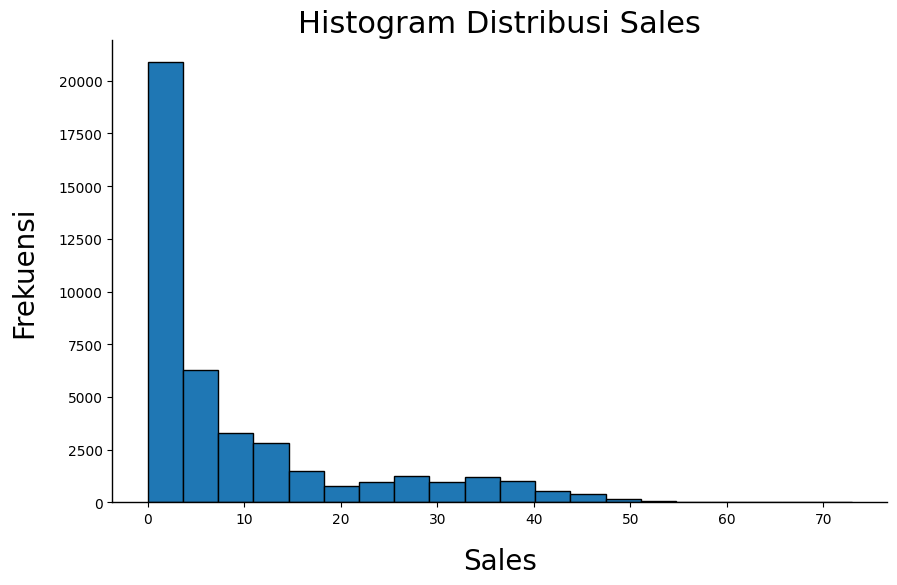

In [22]:
# Histogram of sales distribution
plt.figure(figsize=(10, 6))
plt.hist(dfr[dfr.columns].values.flatten(), bins=20, edgecolor='black')
plt.title('Histogram Distribusi Sales', fontsize=22)
plt.xlabel('Sales', fontsize=20, labelpad=15)
plt.ylabel('Frekuensi', fontsize=20, labelpad=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['left'].set_edgecolor('black')
ax.spines['bottom'].set_edgecolor('black')
plt.show()

### Sales Each Week

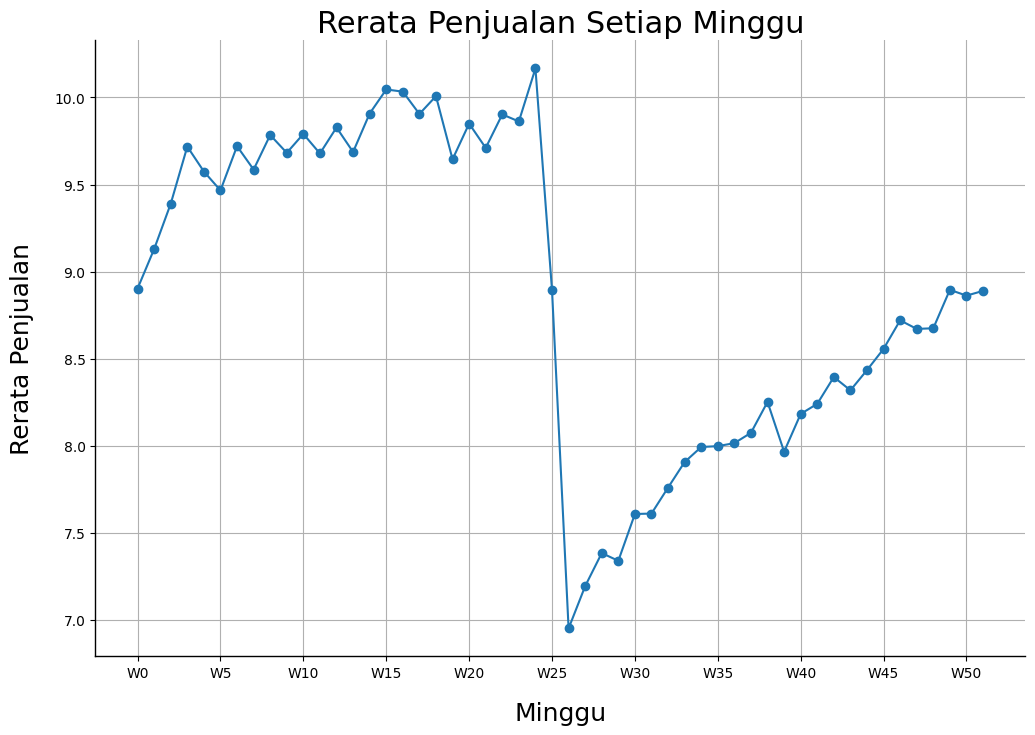

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(df[df.columns[1:53]].mean(), marker='o', linestyle='-')
plt.title('Rerata Penjualan Setiap Minggu', fontsize=22)
plt.xlabel('Minggu', fontsize=18, labelpad=15)
plt.ylabel('Rerata Penjualan', fontsize=18, labelpad=15)
plt.xticks(range(0, 52, 5))  # Show every 5th week for clarity
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['left'].set_edgecolor('black')
ax.spines['bottom'].set_edgecolor('black')
plt.grid(True)
plt.show()


This might useful for knowing which product and why some high sales happened like in week 24 and drop significant at week 26, and getting  increase steadily afterwards.
We also can find the reasons of this happened, like its because of Trends or because the Shop itself have a strategy or a problem.

In [24]:
# Sort the DataFrame by sales in week 24
top_5_week_24_sales = df.sort_values(by='W24', ascending=False).head(5)

# Display the top 5 products
print("Top 5 products with the highest sales in week 24:")
print(top_5_week_24_sales[['Product_Code', 'W24']])


Top 5 products with the highest sales in week 24:
    Product_Code  W24
406         P409   64
261         P262   63
612         P615   50
175         P176   46
183         P184   45


The Product_code doesnt show any name of the product that might help for knowing what happened in that specific week.

### BoxPlot 


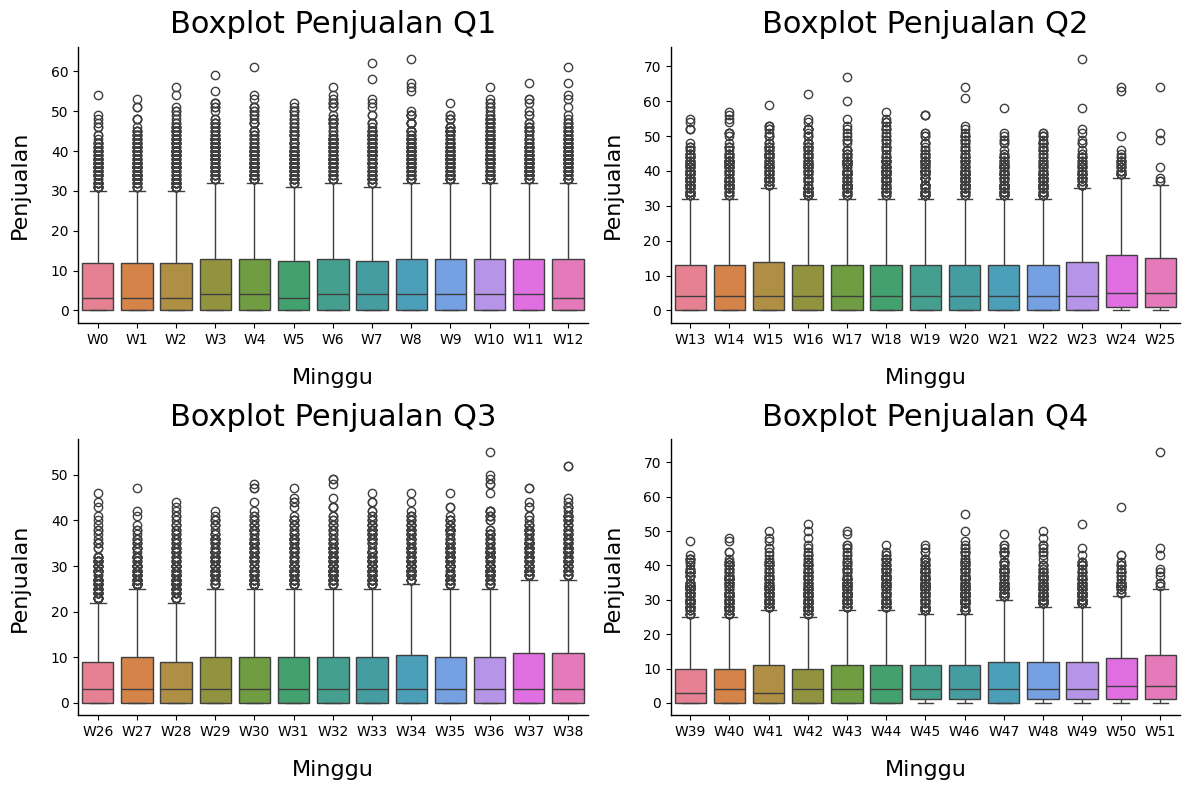

In [25]:
# Split the DataFrame into quarters
quarters = [df[df.columns[1:14]], df[df.columns[14:27]], df[df.columns[27:40]], df[df.columns[40:53]]]
quarter_names = ['Q1', 'Q2', 'Q3', 'Q4']

# Plot boxplots for each quarter
plt.figure(figsize=(12, 8))
for i, quarter in enumerate(quarters):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=quarter, orient='v')
    plt.title(f'Boxplot Penjualan {quarter_names[i]}', fontsize=22, pad=10)
    plt.ylabel('Penjualan', fontsize=16, labelpad=15)
    plt.xlabel('Minggu', fontsize=16, labelpad=15)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['left'].set_edgecolor('black')
    ax.spines['bottom'].set_edgecolor('black')

plt.tight_layout()
plt.show()

### Seasonal Decomposition

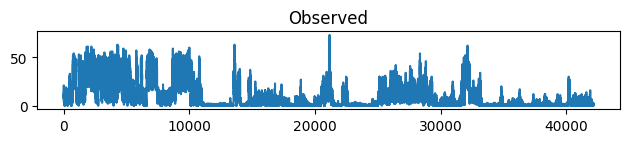

In [26]:
import statsmodels.api as sm

# Assuming 'sales' is your time series data
sales = dfr[dfr.columns].values.flatten()

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(sales, model='additive', period=52)


plt.subplot(411)
plt.plot(result.observed)
plt.title('Observed')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Trend')

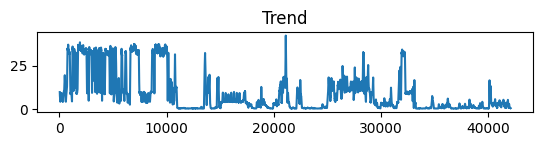

In [27]:
plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend')


Text(0.5, 1.0, 'Residual')

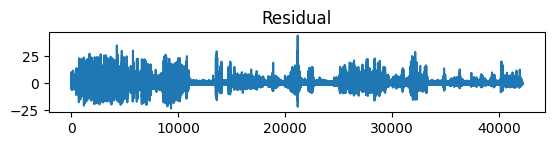

In [28]:
plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual')

## Determining the Use of Raw or Scaled Columns/Datasets

### RAW 

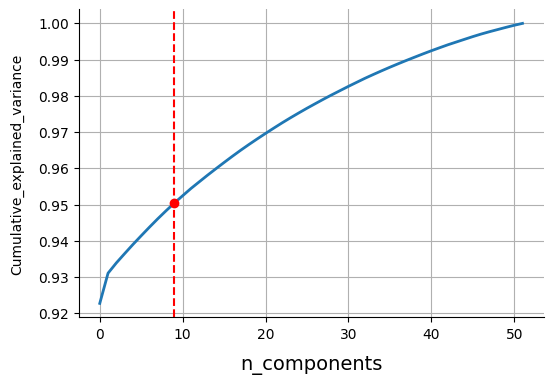

In [29]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=52)
pca_data_pca = pca.fit_transform(dfr)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axvline(x=9, color='r', linestyle='--')  # Add vertical dashed line at n_components=2
plt.plot(9, cum_var_explained[9], 'ro')  # Add a marker at the point (2, cum_var_explained[2])
plt.axis('tight')
plt.grid()
plt.xlabel('n_components', fontsize=14, labelpad=10)
plt.ylabel('Cumulative_explained_variance', fontsize=10, labelpad=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Using a statistical approach, in this raw data, the cumulative explained variance at 95% of the data is found in 8 components or variables, which is good. And if we use 99%, then the components that will be utilized are around 38.

In [30]:
import pandas as pd
from sklearn.decomposition import PCA

# Initialize PCA with 8 components
pca = PCA(n_components=9)

# Fit and transform the data
pca_data_pca = pca.fit_transform(dfr)

# Create a DataFrame from the transformed data
pca_df = pd.DataFrame(pca_data_pca, columns=[f'Component_{i}' for i in range(1, 10)])

# Display the DataFrame
pca_df


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9
0,5.321035,-8.347347,-2.969114,-4.197024,-2.424912,1.184564,4.603727,-7.367531,1.867244
1,-35.764069,-4.438657,-2.976327,-0.898310,-4.007985,4.035018,-5.477174,6.558341,-0.712433
2,-1.850250,-1.919899,2.578747,1.117978,4.135410,-4.421541,0.110322,-0.001210,6.259374
3,-4.691024,-3.533937,1.526300,-1.709606,0.508239,0.728785,2.804813,7.580672,-0.230348
4,-2.953761,1.363289,-7.545758,1.153083,8.110999,0.658639,-1.165552,-8.005441,-2.009890
...,...,...,...,...,...,...,...,...,...
806,-61.135625,-3.821453,-1.068738,-0.595046,-0.708343,1.320403,0.717679,0.409305,0.958500
807,-45.655741,1.679795,2.528071,0.132897,-1.976230,1.373538,2.683067,0.688111,5.913795
808,-60.929080,-1.375483,0.284915,-1.056636,0.369358,-1.067923,-0.288593,1.135331,-0.557024
809,-62.153931,-2.393451,0.656683,0.170436,0.274164,-0.393962,-0.669439,0.142696,0.157672


# Cluster Models

## K-means

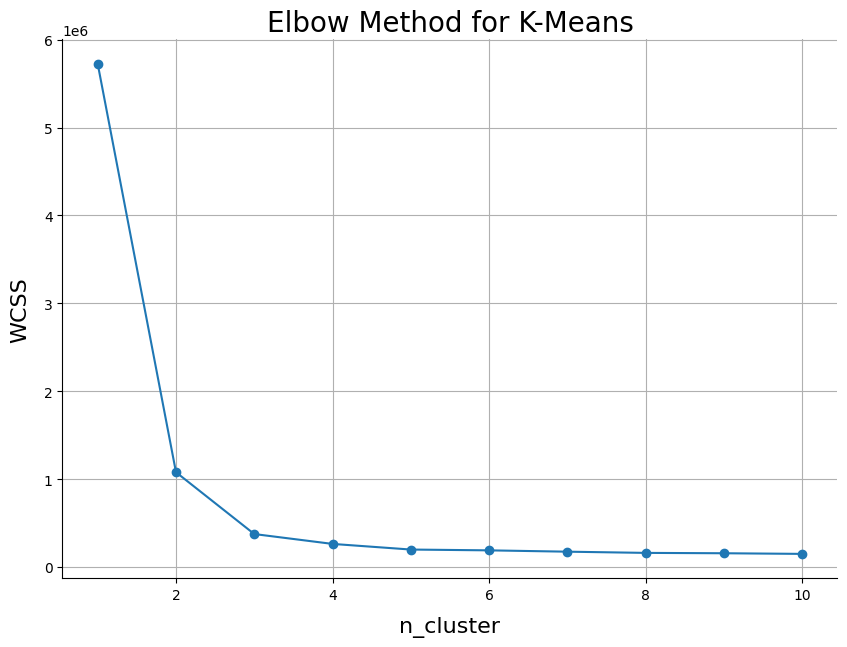

In [45]:
from sklearn.cluster import DBSCAN, KMeans

# Step 3: Create an elbow plot to find the optimal number of clusters
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method for K-Means', fontsize=20)
plt.xlabel('n_cluster', fontsize=16, labelpad=10)
plt.ylabel('WCSS', fontsize=16, labelpad=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True)
plt.show() 

Davies-Bouldin Score: 0.35888531714923155
Silhouette Score: 0.7722800091667991


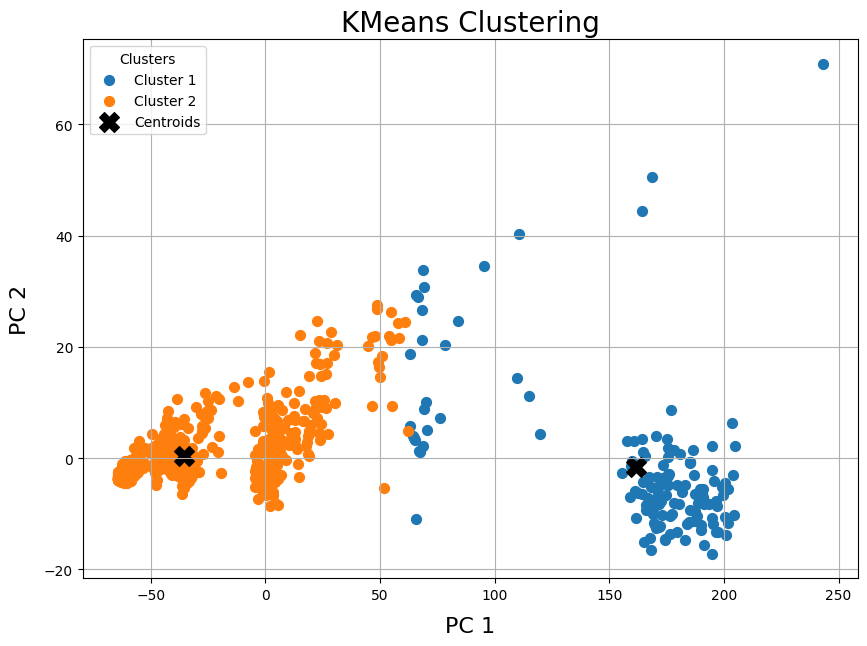

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Step 1: Fit the KMeans model with the optimal number of clusters (3)
optimal_n_clusters = 2
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(pca_df)

# Step 2: Calculate Davies-Bouldin score
db_score = davies_bouldin_score(pca_df, kmeans.labels_)

# Step 3: Calculate Silhouette score
silhouette_avg = silhouette_score(pca_df, kmeans.labels_)

# Print Scores
print(f"Davies-Bouldin Score: {db_score}")
print(f"Silhouette Score: {silhouette_avg}")

# Step 4: Plot the clustered data
plt.figure(figsize=(10, 7))

# Scatter plot for each cluster
for cluster in range(optimal_n_clusters):
    cluster_points = pca_df[kmeans.labels_ == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster + 1}', s=50)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('KMeans Clustering', fontsize=20)
plt.xlabel('PC 1', fontsize=16, labelpad=10)
plt.ylabel('PC 2', fontsize=16, labelpad=10)
plt.legend(title='Clusters')
plt.grid(True)
plt.show()


## Kmedoids

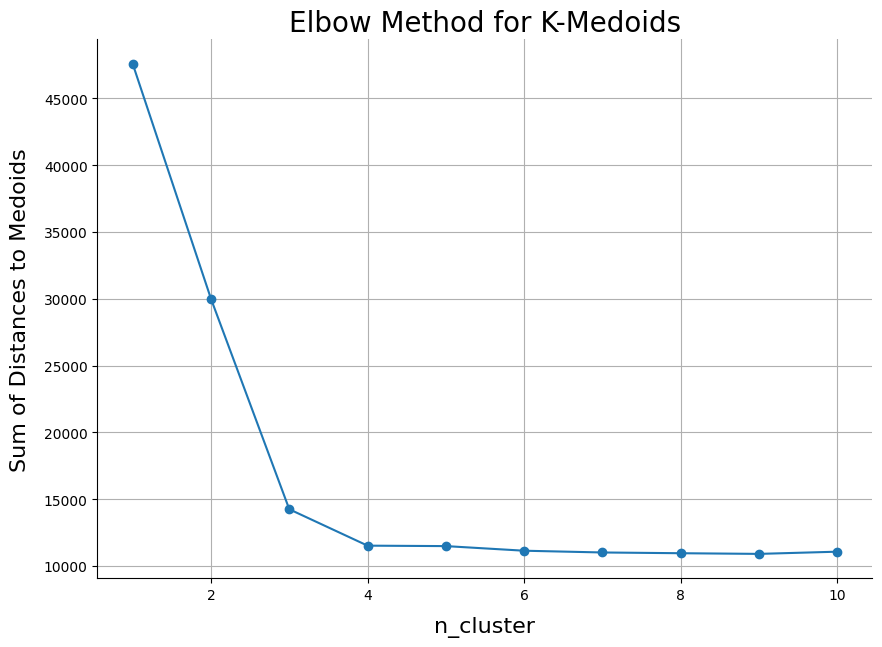

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances

# Step 3: Create an elbow plot to find the optimal number of clusters
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    kmedoids.fit(pca_df)
    # Calculate the sum of distances of samples to their closest cluster center (medoid)
    wcss.append(kmedoids.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method for K-Medoids', fontsize=20)
plt.xlabel('n_cluster', fontsize=16, labelpad=10)
plt.ylabel('Sum of Distances to Medoids', fontsize=16, labelpad=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True)
plt.show()

Davies-Bouldin Score: 0.46159929890206114
Silhouette Score: 0.6925813721905695


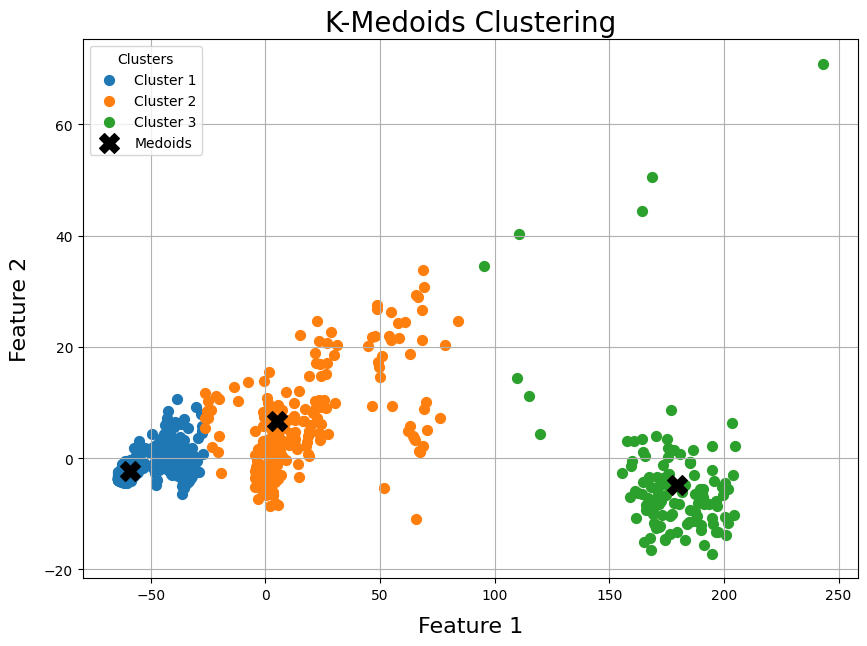

In [49]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Step 1: Fit the k-medoids model with the optimal number of clusters (3)
optimal_n_clusters = 3
kmedoids = KMedoids(n_clusters=optimal_n_clusters, random_state=42)
kmedoids.fit(pca_df)

# Step 2: Calculate Davies-Bouldin score
db_score = davies_bouldin_score(pca_df, kmedoids.labels_)

# Step 3: Calculate Silhouette score
silhouette_avg = silhouette_score(pca_df, kmedoids.labels_)

print(f"Davies-Bouldin Score: {db_score}")
print(f"Silhouette Score: {silhouette_avg}")

# Step 4: Plot the clustered data
plt.figure(figsize=(10, 7))

# Scatter plot for each cluster
for cluster in range(optimal_n_clusters):
    cluster_points = pca_df[kmedoids.labels_ == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster + 1}', s=50)

# Plot the medoids
medoids = kmedoids.cluster_centers_
plt.scatter(medoids[:, 0], medoids[:, 1], s=200, c='black', marker='X', label='Medoids')

plt.title('K-Medoids Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=16, labelpad=10)
plt.ylabel('Feature 2', fontsize=16, labelpad=10)
plt.legend(title='Clusters')
plt.grid(True)
plt.show()

# Conclusion